# Install and Import Dependencies


In [5]:
#import libraries
import pandas as pd
import numpy as np
import warnings;
warnings.simplefilter("ignore")
from fbprophet import Prophet
from scipy.stats import boxcox



# Read in Data and Process Data

In [6]:
# download Data
df = pd.read_excel("Case_License_Volume_2021-06-01_08-43-48.xlsx", sheet_name="Data")

# set dtypes
df["Period"] = pd.to_datetime(df.Period)

#dropna
df.dropna(how="any")

#in case the dates are seperated we can merge them together with the lower mentioned function:
#pd.DatetimeIndex(df[" "] +"-"+df[" "])


,Application Group,Case Complexity,Period,Application,Standard Case Equivalent,Case Count Country Factor,Case Count
0,ACESFW,BASIC,2021-05-01,ACESFW,6.40,25.6,32
1,ACESFW,BASIC,2021-04-01,ACESFW,8.10,32.4,38
2,ACESFW,BASIC,2021-03-01,ACESFW,9.00,36.0,39
3,ACESFW,BASIC,2021-02-01,ACESFW,16.45,65.8,76
4,ACESFW,BASIC,2021-01-01,ACESFW,2.65,10.6,12
...,...,...,...,...,...,...,...
1662,UOM,STANDARD,2021-05-01,E2ESI,297.40,297.4,299
1663,UOM,STANDARD,2021-04-01,E2EDI,1712.00,1712.0,1744
1664,UOM,STANDARD,2021-04-01,E2ESI,376.20,376.2,381
1665,UOM,STANDARD,2021-03-01,E2EDI,882.40,882.4,904


### Case Count Prediction

#### Data Preparations

In [7]:
#lets rename the columns for the Prophet. In this case we call case count as y
df.rename(columns= {"Period": "ds", "Standard Case Equivalent": "y"}, inplace= True )

#we group the AG and Period as a sum to get the distinctive variables and avoid duplicates.
#here we create grouped Date Frame with out any index, in order to manipulate with AG and period later on.
df = df.groupby(["Application Group", "ds"], as_index = False).sum()


#to assign application groups to certain index we group them by App Gr.
df["Index"] = df.groupby(["Application Group"]).ngroup()



In [8]:
df

,Application Group,ds,y,Case Count Country Factor,Case Count,Index
0,ACESFW,2020-05-01,0.45,1.8,3,0
1,ACESFW,2020-12-01,0.50,2.0,2,0
2,ACESFW,2021-01-01,2.65,10.6,12,0
3,ACESFW,2021-02-01,16.45,65.8,76,0
4,ACESFW,2021-03-01,9.00,36.0,39,0
...,...,...,...,...,...,...
386,UOM,2021-01-01,8117.80,8117.8,9392,24
387,UOM,2021-02-01,12116.60,12116.6,14057,24
388,UOM,2021-03-01,10478.40,10478.4,12133,24
389,UOM,2021-04-01,9800.80,9800.8,10929,24


#### model_0 

After Data Preperations we can built first model for the 1st Application

In [36]:
#our filter is App Gr "ACESFW" which has index 0
filt = df["Index"] == 0
model_0 = df.loc[filt,["ds", "y"]]

# Train Model

#### train_model_0

In [37]:
#building Ml Model - PROPHET
m = Prophet(interval_width=0.95)
model0 = m.fit(model_0)
#red sign indicates that there are too little variables

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


# Forecast Away

,ds,yhat
0,2020-05-01,-0.150314
1,2020-12-01,5.337848
2,2021-01-01,6.132862
3,2021-02-01,6.927876
4,2021-03-01,7.645953
5,2021-04-01,8.440968
6,2021-05-01,9.210336
7,2021-05-31,9.979704
8,2021-06-30,10.749073
9,2021-07-31,11.544087


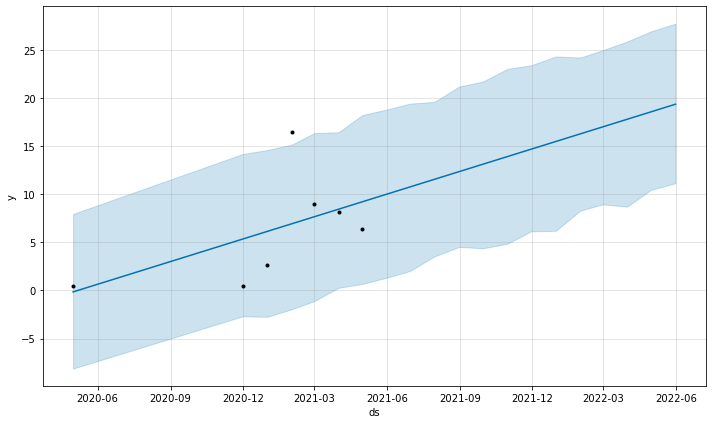

In [38]:
future0 = m.make_future_dataframe(periods=13, freq='M')
forecast0 = m.predict(future0)

m.plot(forecast0)
forecast0[["ds", "yhat"]]

### train_model_1

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


,ds,yhat
0,2019-10-01,14.110867
1,2019-11-01,9.686390
2,2019-12-01,13.762256
3,2020-01-01,8.960608
4,2020-02-01,13.450836
5,2020-03-01,13.169881
6,2020-04-01,8.368233
7,2020-05-01,8.501640
8,2020-06-01,11.043646
9,2020-07-01,7.775859


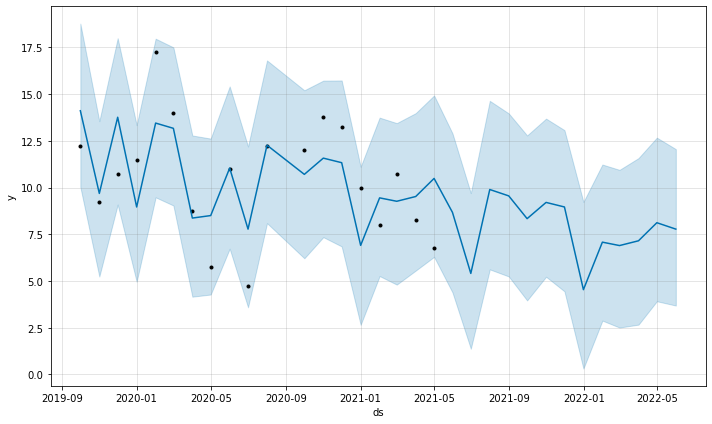

In [39]:
filt1 = df["Index"] == 1
model_1 = df.loc[filt1,["ds", "y"]]
m1 = Prophet(interval_width=0.95, weekly_seasonality=True)
model1 = m1.fit(model_1)
future1 = m1.make_future_dataframe(periods=13, freq='M')
forecast1 = m1.predict(future1)
m1.plot(forecast1)
forecast1[["ds", "yhat"]]

### train_model_2

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


,ds,yhat
0,2019-10-01,467892.451926
1,2019-11-01,416811.159990
2,2019-12-01,439030.167280
3,2020-01-01,370481.214173
4,2020-02-01,416181.260286
5,2020-03-01,477313.337212
6,2020-04-01,408764.384111
7,2020-05-01,493377.499877
8,2020-06-01,462915.391200
9,2020-07-01,447047.554101


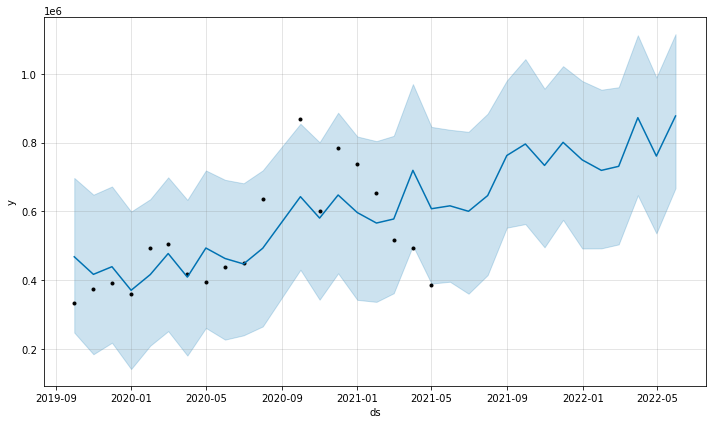

In [40]:
filt2 = df["Index"] == 2
model_2 = df.loc[filt2,["ds", "y"]]
m2 = Prophet(interval_width=0.95, weekly_seasonality=True)
model2 = m2.fit(model_2)
future2 = m2.make_future_dataframe(periods=13, freq='M')
forecast2 = m2.predict(future2)
m2.plot(forecast2)
forecast2[["ds", "yhat"]]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


,ds,yhat
0,2019-10-01,3.265469
1,2019-11-01,4.324279
2,2019-12-01,5.726082
3,2020-01-01,3.204507
4,2020-02-01,4.266368
5,2020-03-01,5.804523
6,2020-04-01,3.282948
7,2020-05-01,4.481161
8,2020-06-01,3.350975
9,2020-07-01,3.361389


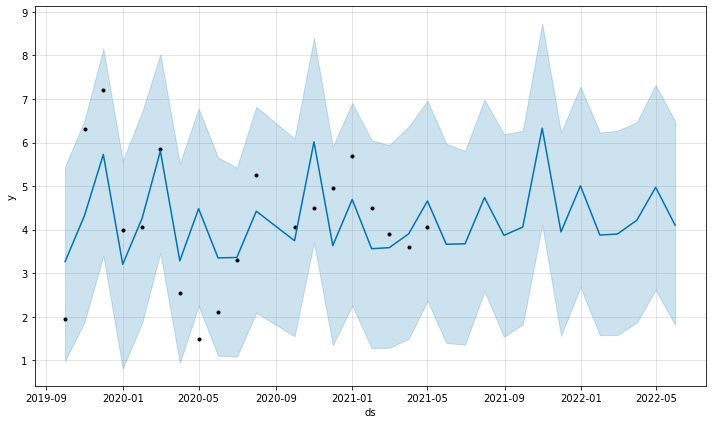

In [41]:
filt3 = df["Index"] == 3
model_3 = df.loc[filt3,["ds", "y"]]
m3 = Prophet(interval_width=0.95, weekly_seasonality=True)
model3 = m3.fit(model_3)
future3 = m3.make_future_dataframe(periods=13, freq='M')
forecast3 = m3.predict(future3)

m3.plot(forecast3)
forecast3[["ds", "yhat"]]

#### train_model_4

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


,ds,yhat
0,2019-10-01,24.157805
1,2019-11-01,30.846501
2,2019-12-01,65.395517
3,2020-01-01,37.073026
4,2020-02-01,26.422296
5,2020-03-01,65.153573
6,2020-04-01,36.831083
7,2020-05-01,30.362614
8,2020-06-01,38.721886
9,2020-07-01,36.589140


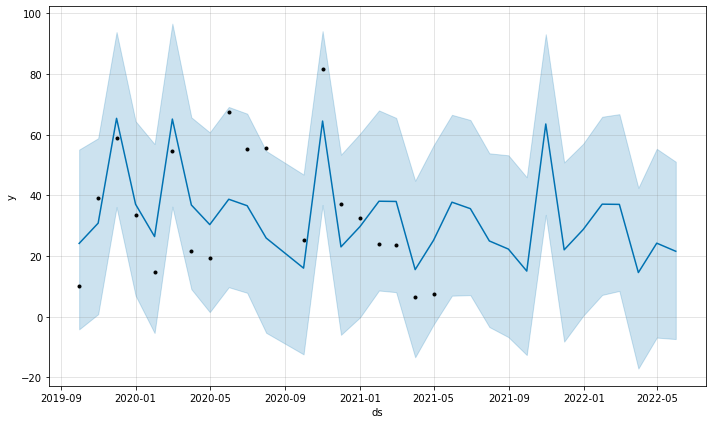

In [42]:
filt4 = df["Index"] == 4
model_4 = df.loc[filt4,["ds", "y"]]
m4 = Prophet(interval_width=0.95, weekly_seasonality=True)
model4 = m4.fit(model_4)
future4 = m4.make_future_dataframe(periods=13, freq='M')
forecast4 = m4.predict(future4)

m4.plot(forecast4)
forecast4[["ds", "yhat"]]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


,ds,yhat
0,2019-10-01,29712.953683
1,2019-11-01,24685.496951
2,2019-12-01,34439.146234
3,2020-01-01,29936.301605
4,2020-02-01,26515.012065
5,2020-03-01,42959.502337
6,2020-04-01,38456.657707
7,2020-05-01,41726.209159
8,2020-06-01,44069.278543
9,2020-07-01,46977.013808


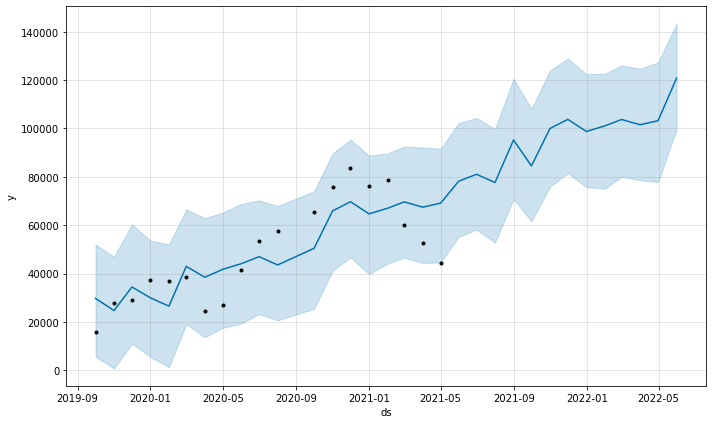

In [43]:
filt5 = df["Index"] == 5
model_5 = df.loc[filt5,["ds", "y"]]
m5 = Prophet(interval_width=0.95, weekly_seasonality=True)
model5 = m5.fit(model_5)
future5 = m5.make_future_dataframe(periods=13, freq='M')
forecast5 = m5.predict(future5)

m5.plot(forecast5)
forecast5[["ds", "yhat"]]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.


,ds,yhat
0,2019-10-01,38.990345
1,2019-11-01,49.934617
2,2019-12-01,28.460614
3,2020-01-01,34.994304
4,2020-02-01,8.629793
5,2020-03-01,21.385807
6,2020-06-01,15.573633
7,2020-07-01,20.844689
8,2020-08-01,-5.519822
9,2020-10-01,0.459713


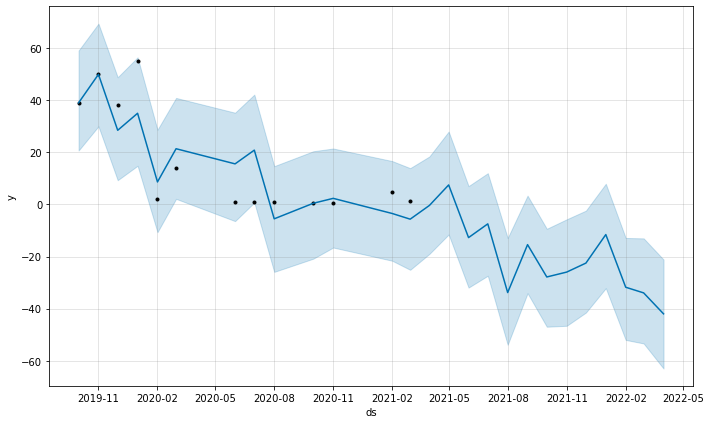

In [44]:
filt6 = df["Index"] == 6
model_6 = df.loc[filt6,["ds", "y"]]
m6 = Prophet(interval_width=0.95,  weekly_seasonality=True)
model6 = m6.fit(model_6)
future6 = m6.make_future_dataframe(periods=13, freq='M')
forecast6 = m6.predict(future6)

m6.plot(forecast6)
forecast6[["ds", "yhat"]]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.


,ds,yhat
0,2019-10-01,7.079692
1,2019-11-01,6.218055
2,2019-12-01,13.919858
3,2020-02-01,3.910135
4,2020-03-01,13.672658
5,2020-04-01,12.623085
6,2020-05-01,5.723655
7,2020-06-01,26.602269
8,2020-07-01,12.375882
9,2020-08-01,3.415730


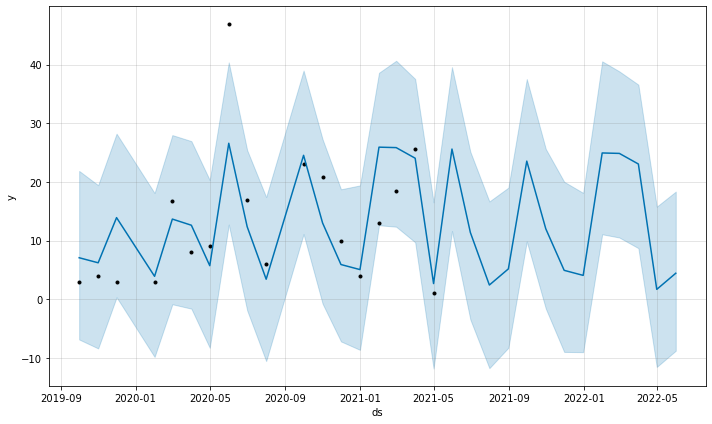

In [45]:
filt7 = df["Index"] == 7
model_7 = df.loc[filt7,["ds", "y"]]
m7 = Prophet(interval_width=0.95, weekly_seasonality=True)
model7 = m7.fit(model_7)
future7 = m7.make_future_dataframe(periods=13, freq='M')
forecast7 = m7.predict(future7)

m7.plot(forecast7)
forecast7[["ds", "yhat"]]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


,ds,yhat
0,2019-10-01,3445.526369
1,2019-11-01,3759.649499
2,2019-12-01,3245.044783
3,2020-01-01,3368.054597
4,2020-02-01,3568.273230
5,2020-03-01,3072.554121
6,2020-04-01,3195.563934
7,2020-05-01,3414.668173
8,2020-06-01,3385.210559
9,2020-07-01,3023.073272


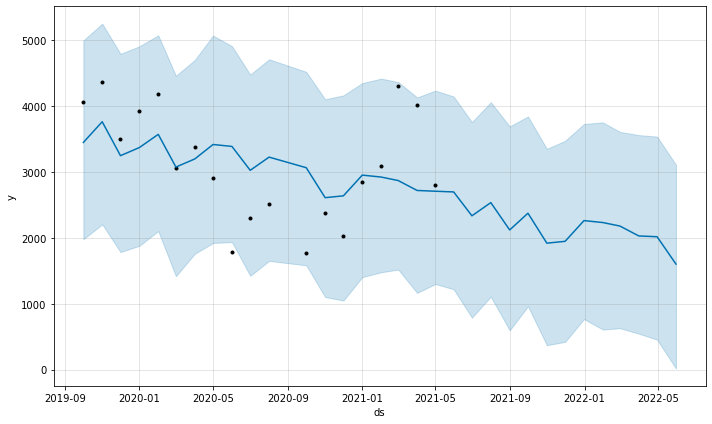

In [46]:
filt8 = df["Index"] == 8
model_8 = df.loc[filt8,["ds", "y"]]
m8 = Prophet(interval_width=0.95, weekly_seasonality=True)
model8 = m8.fit(model_8)
future8 = m8.make_future_dataframe(periods=13, freq='M')
forecast8 = m8.predict(future8)

m8.plot(forecast8)
forecast8[["ds", "yhat"]]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.


,ds,yhat
0,2020-03-01,0.15
1,2021-03-01,0.15
2,2021-03-31,0.15
3,2021-04-30,0.15
4,2021-05-31,0.15
5,2021-06-30,0.15
6,2021-07-31,0.15
7,2021-08-31,0.15
8,2021-09-30,0.15
9,2021-10-31,0.15


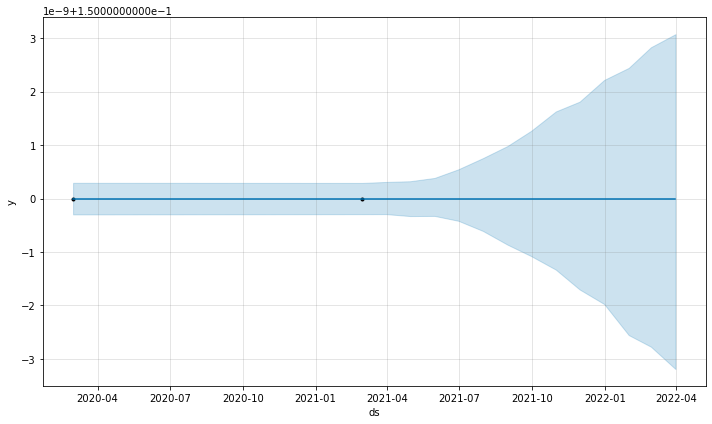

In [47]:
filt9 = df["Index"] == 9
model_9 = df.loc[filt9,["ds", "y"]]
m9 = Prophet(interval_width=0.95, weekly_seasonality=True)
model9 = m9.fit(model_9)
future9 = m9.make_future_dataframe(periods=13, freq='M')
forecast9 = m9.predict(future9)

m9.plot(forecast9)
forecast9[["ds", "yhat"]]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


,ds,yhat
0,2019-10-01,28792.143979
1,2019-11-01,19667.361506
2,2019-12-01,16922.358250
3,2020-01-01,19751.040165
4,2020-02-01,20204.832298
5,2020-03-01,21782.508583
6,2020-04-01,24611.190497
7,2020-05-01,29387.662170
8,2020-06-01,30820.008007
9,2020-07-01,29471.767123


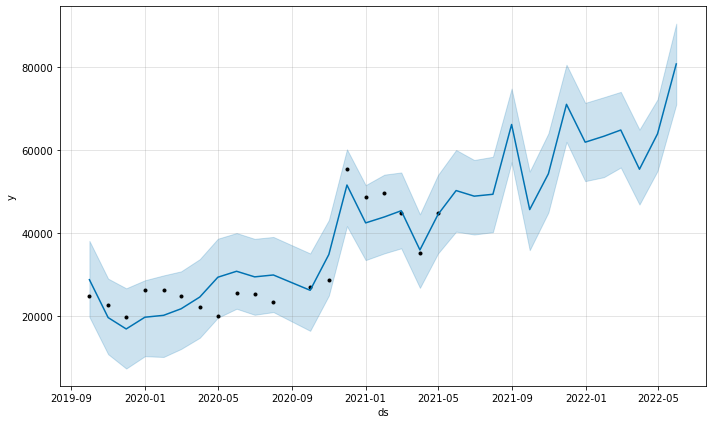

In [48]:
filt10 = df["Index"] == 10
model_10 = df.loc[filt10,["ds", "y"]]
m10 = Prophet(interval_width=0.95, weekly_seasonality=True)
model10 = m10.fit(model_10)
future10 = m10.make_future_dataframe(periods=13, freq='M')
forecast10 = m10.predict(future10)

m10.plot(forecast10)
forecast10[["ds", "yhat"]]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


,ds,yhat
0,2019-10-01,1625.056376
1,2019-11-01,1435.533907
2,2019-12-01,1472.898891
3,2020-01-01,1753.540643
4,2020-02-01,1270.960108
5,2020-03-01,1446.633296
6,2020-04-01,1727.275046
7,2020-05-01,1383.002712
8,2020-06-01,1426.048440
9,2020-07-01,1701.009444


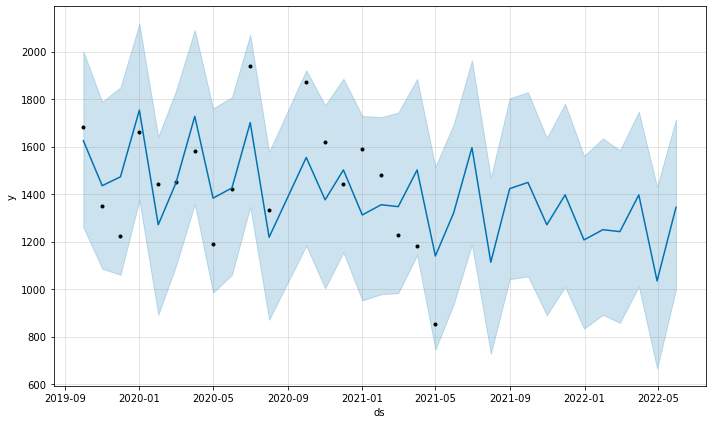

In [49]:
filt11 = df["Index"] == 11
model_11 = df.loc[filt11,["ds", "y"]]
m11 = Prophet(interval_width=0.95, weekly_seasonality=True)
model11 = m11.fit(model_11)
future11 = m11.make_future_dataframe(periods=13, freq='M')
forecast11 = m11.predict(future11)

m11.plot(forecast11)
forecast11[["ds", "yhat"]]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


,ds,yhat
0,2019-10-01,195.294006
1,2019-11-01,221.039627
2,2019-12-01,339.594573
3,2020-01-01,285.660986
4,2020-02-01,171.883332
5,2020-03-01,354.129445
6,2020-04-01,300.195857
7,2020-05-01,250.109370
8,2020-06-01,273.351783
9,2020-07-01,314.730729


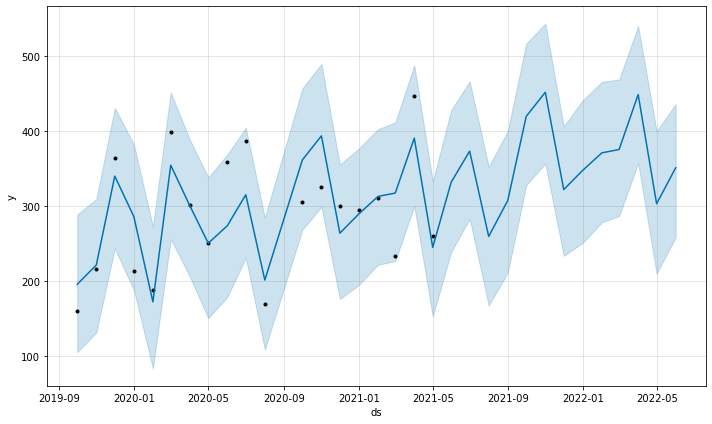

In [50]:
filt12 = df["Index"] == 12
model_12 = df.loc[filt12,["ds", "y"]]
m12 = Prophet(interval_width=0.95, weekly_seasonality=True)
model12 = m12.fit(model_12)
future12 = m12.make_future_dataframe(periods=13, freq = "M")
forecast12 = m12.predict(future12)

m12.plot(forecast12)
forecast12[["ds", "yhat"]]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


,ds,yhat
0,2019-10-01,621.807196
1,2019-11-01,343.419917
2,2019-12-01,680.256953
3,2020-01-01,413.282415
4,2020-02-01,617.072205
5,2020-03-01,627.291942
6,2020-04-01,360.317404
7,2020-05-01,237.489895
8,2020-06-01,425.270913
9,2020-07-01,307.352393


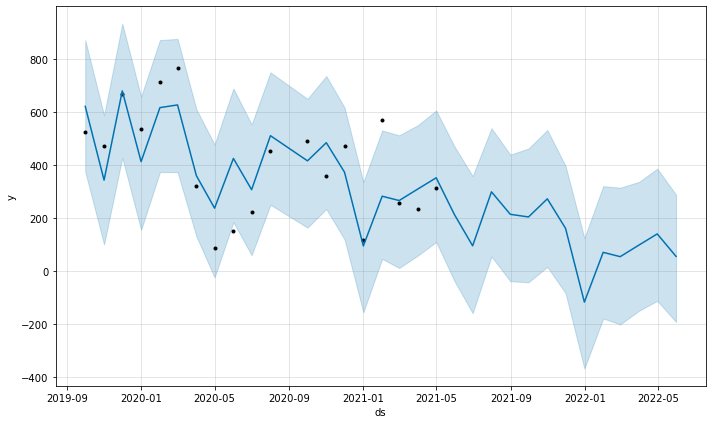

In [51]:
filt13 = df["Index"] == 13
model_13 = df.loc[filt13,["ds", "y"]]
m13 = Prophet(interval_width=0.95, weekly_seasonality=True)
model13 = m13.fit(model_13)
future13 = m13.make_future_dataframe(periods=13, freq='M')
forecast13 = m13.predict(future13)

m13.plot(forecast13)
forecast13[["ds", "yhat"]]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


,ds,yhat
0,2019-10-01,55.710325
1,2019-11-01,66.834982
2,2019-12-01,54.176184
3,2020-01-01,56.183772
4,2020-02-01,51.727208
5,2020-03-01,50.189896
6,2020-04-01,52.197484
7,2020-05-01,58.862405
8,2020-06-01,45.001862
9,2020-07-01,48.211195


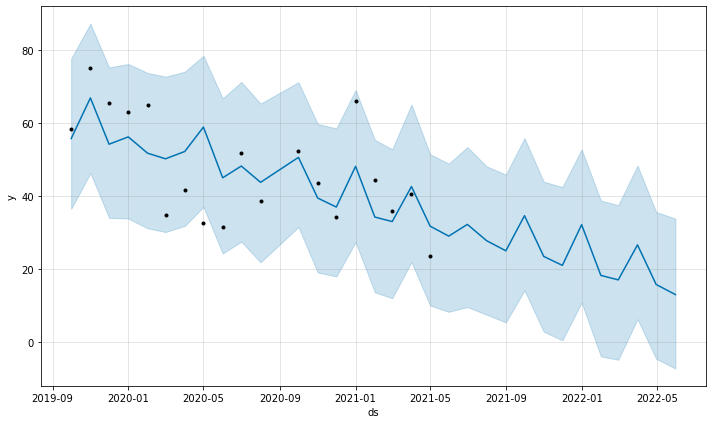

In [58]:
filt14 = df["Index"] == 14
model_14 = df.loc[filt14,["ds", "y"]]
m14 = Prophet(interval_width=0.95, weekly_seasonality=True)
model14 = m14.fit(model_14)
future14 = m14.make_future_dataframe(periods=13, freq='M')
forecast14 = m14.predict(future14)

m14.plot(forecast14)
forecast14[["ds", "yhat"]]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


,ds,yhat
0,2020-11-01,6.600000
1,2020-12-01,21.400000
2,2021-01-01,58.800000
3,2021-02-01,33.200000
4,2021-03-01,81.000000
5,2021-04-01,89.400000
6,2021-05-01,339.000000
7,2021-05-31,236.350002
8,2021-06-30,10484.204480
9,2021-07-31,494.350002


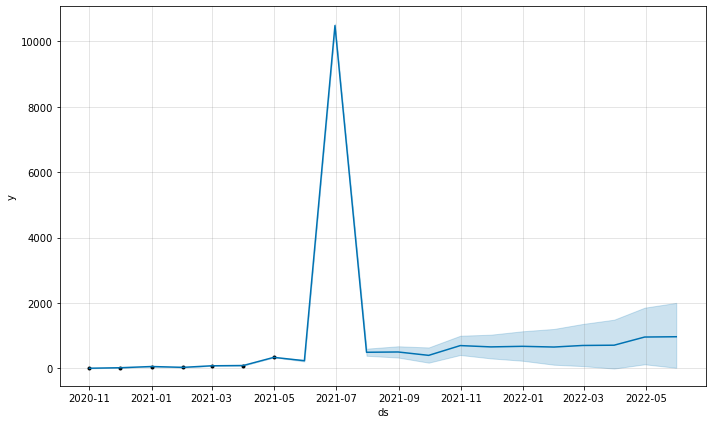

In [59]:
filt15 = df["Index"] == 15
model_15 = df.loc[filt15,["ds", "y"]]
m15 = Prophet(interval_width=0.95, weekly_seasonality=True)
model15 = m15.fit(model_15)
future15 = m15.make_future_dataframe(periods=13, freq='M')
forecast15 = m15.predict(future15)

m15.plot(forecast15)
forecast15[["ds", "yhat"]]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


,ds,yhat
0,2019-10-01,79.400380
1,2019-11-01,112.728167
2,2019-12-01,94.439765
3,2020-01-01,82.812405
4,2020-02-01,70.900351
5,2020-03-01,93.690409
6,2020-04-01,82.063050
7,2020-05-01,111.229456
8,2020-06-01,106.133792
9,2020-07-01,81.313695


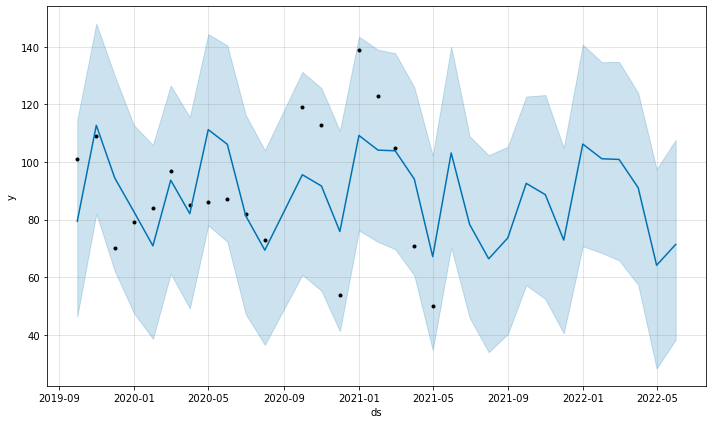

In [60]:
filt16 = df["Index"] == 16
model_16 = df.loc[filt16,["ds", "y"]]
m16 = Prophet(interval_width=0.95, weekly_seasonality=True)
model16 = m16.fit(model_16)
future16 = m16.make_future_dataframe(periods=13, freq='M')
forecast16 = m16.predict(future16)

m16.plot(forecast16)
forecast16[["ds", "yhat"]]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


,ds,yhat
0,2019-10-01,399.057404
1,2019-11-01,619.394132
2,2019-12-01,844.178943
3,2020-01-01,850.797460
4,2020-02-01,710.323632
5,2020-03-01,930.143878
6,2020-04-01,936.762394
7,2020-05-01,791.324001
8,2020-06-01,990.825602
9,2020-07-01,1022.727329


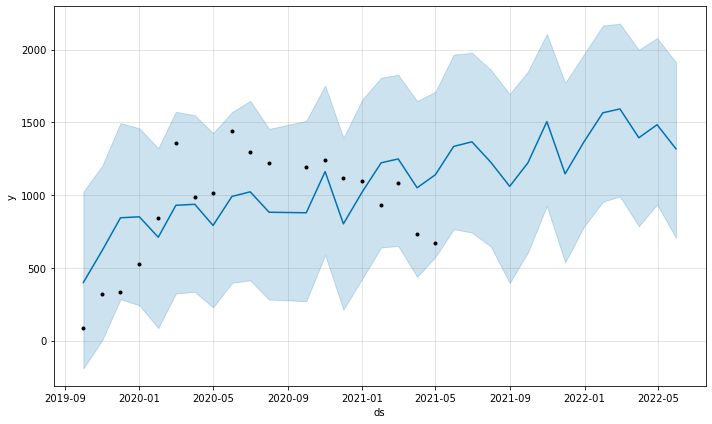

In [61]:
filt17 = df["Index"] == 17
model_17 = df.loc[filt17,["ds", "y"]]
m17 = Prophet(interval_width=0.95, weekly_seasonality=True)
model17 = m17.fit(model_17)
future17 = m17.make_future_dataframe(periods=13, freq='M')
forecast17 = m17.predict(future17)

m17.plot(forecast17)
forecast17[["ds", "yhat"]]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


,ds,yhat
0,2019-10-01,35.162770
1,2019-11-01,36.939788
2,2019-12-01,31.864850
3,2020-01-01,34.173399
4,2020-02-01,32.376413
5,2020-03-01,29.304161
6,2020-04-01,31.612710
7,2020-05-01,31.818410
8,2020-06-01,32.963274
9,2020-07-01,29.052021


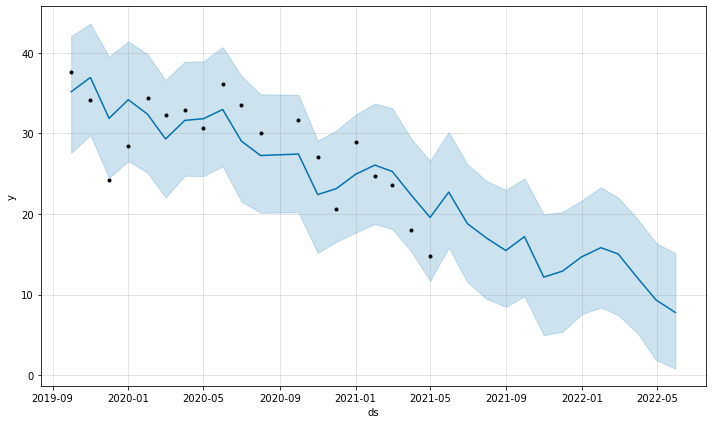

In [62]:
filt18 = df["Index"] == 18
model_18 = df.loc[filt18,["ds", "y"]]
m18 = Prophet(interval_width=0.95, weekly_seasonality=True)
model18 = m18.fit(model_18)
future18 = m18.make_future_dataframe(periods=13, freq='M')
forecast18 = m18.predict(future18)

m18.plot(forecast18)
forecast18[["ds", "yhat"]]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


,ds,yhat
0,2019-11-01,445.776104
1,2020-01-01,29.752419
2,2020-02-01,-485.760545
3,2020-04-01,225.359943
4,2020-07-01,420.967467
5,2020-11-01,3.616038
6,2020-12-01,454.306579
7,2021-01-01,1363.626794
8,2021-02-01,235.069275
9,2021-03-01,295.256206


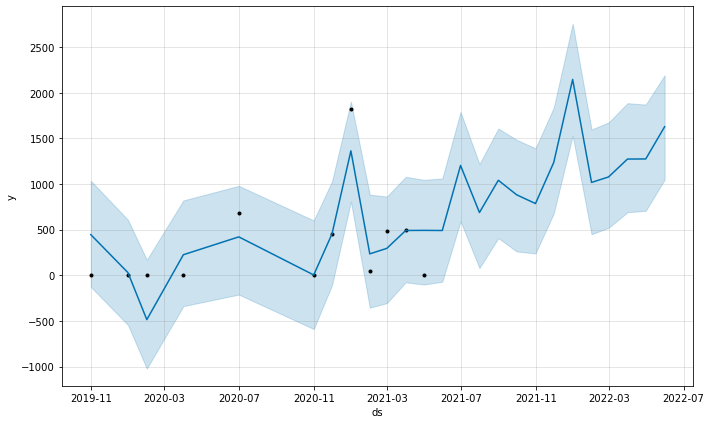

In [63]:
filt19 = df["Index"] == 19
model_19 = df.loc[filt19,["ds", "y"]]
m19 = Prophet(interval_width=0.95, weekly_seasonality=True)
model19 = m19.fit(model_19)
future19 = m19.make_future_dataframe(periods=13, freq='M')
forecast19 = m19.predict(future19)

m19.plot(forecast19)
forecast19[["ds", "yhat"]]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


,ds,yhat
0,2020-11-01,804.546906
1,2020-12-01,794.662060
2,2021-01-01,784.447719
3,2021-02-01,774.233379
4,2021-03-01,765.007522
5,2021-04-01,754.793182
6,2021-05-01,744.908336
7,2021-05-31,735.023490
8,2021-06-30,725.138644
9,2021-07-31,714.924303


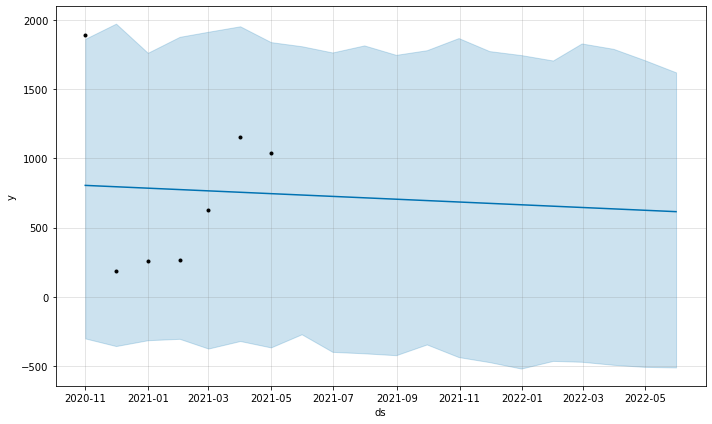

In [64]:
filt20 = df["Index"] == 20
model_20 = df.loc[filt20,["ds", "y"]]
m20 = Prophet(interval_width=0.95)
model20 = m20.fit(model_20)
future20 = m20.make_future_dataframe(periods=13, freq='M')
forecast20 = m20.predict(future20)
m20.plot(forecast20)
forecast20[["ds", "yhat"]]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


,ds,yhat
0,2019-10-01,103.186722
1,2019-11-01,121.536337
2,2019-12-01,107.624056
3,2020-01-01,123.153821
4,2020-02-01,98.037284
5,2020-03-01,103.389064
6,2020-04-01,118.918829
7,2020-05-01,113.066352
8,2020-06-01,101.045769
9,2020-07-01,114.683836


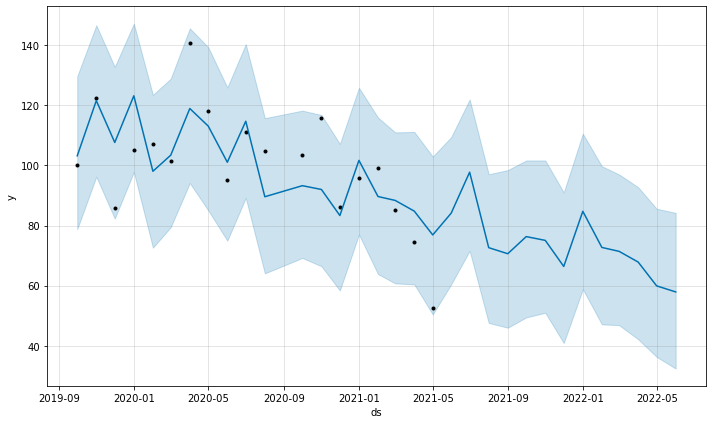

In [65]:
filt21 = df["Index"] == 21
model_21 = df.loc[filt21,["ds", "y"]]
m21 = Prophet(interval_width=0.95, weekly_seasonality=True)
model21 = m21.fit(model_21)
future21 = m21.make_future_dataframe(periods=13, freq='M')
forecast21 = m21.predict(future21)
m21.plot(forecast21)
forecast21[["ds", "yhat"]]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.


,ds,yhat
0,2021-04-01,14.000000
1,2021-05-01,36.000000
2,2021-05-31,23.224056
3,2021-06-30,-6.003393
4,2021-07-31,50.823298
5,2021-08-31,94.794728
6,2021-09-30,43.646597
7,2021-10-31,140.420711
8,2021-11-30,109.618027
9,2021-12-31,-35.849199


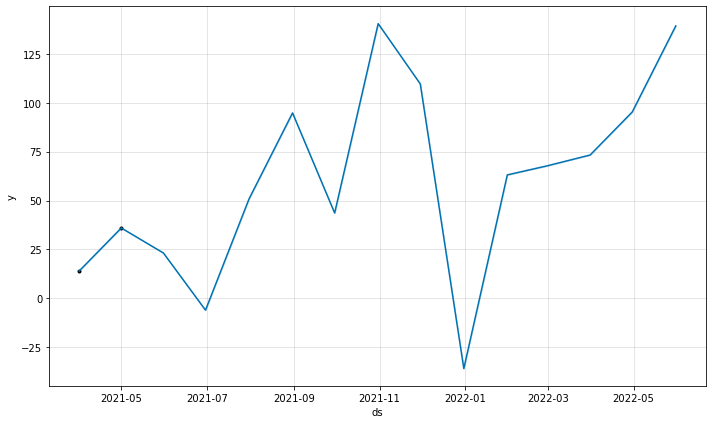

In [66]:
filt22 = df["Index"] == 22
model_22 = df.loc[filt22,["ds", "y"]]
m22 = Prophet(interval_width=0.95, weekly_seasonality=True)
model22 = m22.fit(model_22)
future22 = m22.make_future_dataframe(periods=13, freq='M')
forecast22 = m22.predict(future22)
m22.plot(forecast22)
forecast22[["ds", "yhat"]]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


,ds,yhat
0,2019-10-01,546.625456
1,2019-11-01,622.745547
2,2019-12-01,590.330317
3,2020-01-01,625.330217
4,2020-02-01,550.764433
5,2020-03-01,542.381642
6,2020-04-01,577.381541
7,2020-05-01,526.848196
8,2020-06-01,560.711073
9,2020-07-01,529.432866


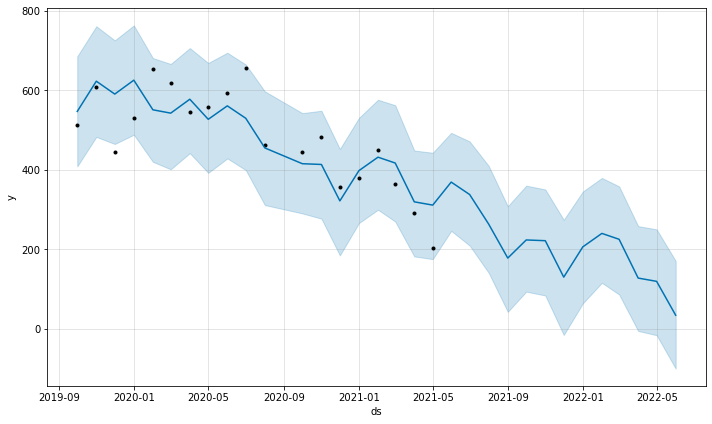

In [67]:
filt23 = df["Index"] == 23
model_23 = df.loc[filt23,["ds", "y"]]
m23 = Prophet(interval_width=0.95, weekly_seasonality=True)
model23 = m23.fit(model_23)
future23 = m23.make_future_dataframe(periods=13, freq='M')
forecast23 = m23.predict(future23)
m23.plot(forecast23)
forecast23[["ds", "yhat"]]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


,ds,yhat
0,2019-10-01,-243.258058
1,2019-11-01,-92.673297
2,2019-12-01,-150.558464
3,2020-01-01,-114.000166
4,2020-02-01,295.553118
5,2020-03-01,1500.127009
6,2020-04-01,1536.685307
7,2020-05-01,3208.697651
8,2020-06-01,5014.074213
9,2020-07-01,3187.371166


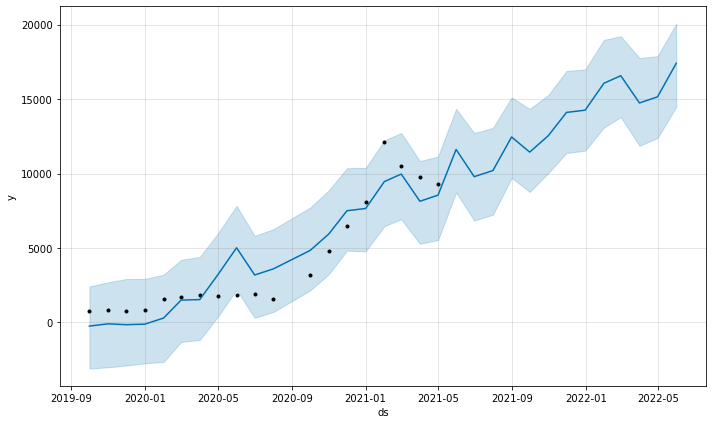

In [68]:
filt24 = df["Index"] == 24
model_24 = df.loc[filt24,["ds", "y"]]
m24 = Prophet(interval_width=0.95, weekly_seasonality=True)
model24 = m24.fit(model_24)
future24 = m24.make_future_dataframe(periods=13, freq='M')
forecast24 = m24.predict(future24)
m24.plot(forecast24)
forecast24[["ds", "yhat"]]

In [69]:
#lets make all results in one table
#download reduce function
from functools import reduce
#put the results in one DF
dfs = [forecast0[["ds", "yhat"]], forecast1[["ds", "yhat"]], forecast2[["ds", "yhat"]], forecast3[["ds", "yhat"]], forecast4[["ds", "yhat"]],
      forecast5[["ds", "yhat"]], forecast6[["ds", "yhat"]], forecast7[["ds", "yhat"]], forecast8[["ds", "yhat"]], forecast9[["ds", "yhat"]],
      forecast10[["ds", "yhat"]], forecast11[["ds", "yhat"]], forecast12[["ds", "yhat"]], forecast13[["ds", "yhat"]], 
      forecast14[["ds", "yhat"]], forecast15[["ds", "yhat"]], forecast16[["ds", "yhat"]], forecast17[["ds", "yhat"]],
      forecast18[["ds", "yhat"]], forecast19[["ds", "yhat"]], forecast20[["ds", "yhat"]], forecast21[["ds", "yhat"]],
      forecast22[["ds", "yhat"]], forecast23[["ds", "yhat"]], forecast24[["ds", "yhat"]]]
#merge on one column
df_final = reduce(lambda left,right: pd.merge(left,right,on='ds'), dfs)

In [72]:
#pull out excel file and make a dashboard in excel
df_final.to_excel("ResultsSCE1.xlsx")